# MNIST handwritten digits classification with CNNs

In this notebook, we'll train a convolutional neural network (CNN, ConvNet) to classify MNIST digits using Keras (with either Theano or Tensorflow as the compute backend).  Keras version $\ge$ 2 is required. 

This notebook builds on the MNIST-MLP notebook, so the recommended order is to go through the MNIST-MLP notebook before starting with this one. 

First, the needed imports. Note that there are a few new layers compared to the MNIST-MLP notebook: Flatten, MaxPooling2D, Conv2D.

In [1]:
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D
from keras.layers.convolutional import Conv2D 
from keras.utils import np_utils
from keras import backend as K

from distutils.version import LooseVersion as LV
from keras import __version__

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('Using Keras version:', __version__, 'backend:', K.backend())
assert(LV(__version__) >= LV("2.0.0"))

Using TensorFlow backend.


Using Keras version: 2.0.6 backend: tensorflow


/appl/opt/python/3.4.5-gcc493-shared/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
nb_classes = 10

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# one-hot encoding:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print()
print('MNIST data loaded: train:',len(X_train),'test:',len(X_test))
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Y_train:', Y_train.shape)


MNIST data loaded: train: 60000 test: 10000
X_train: (60000, 28, 28)
y_train: (60000,)
Y_train: (60000, 10)


We'll have to do a bit of tensor manipulations, depending on the used backend (Theano or Tensorflow).

In [3]:
# input image dimensions
img_rows, img_cols = 28, 28

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train:', X_train.shape)

X_train: (60000, 28, 28, 1)


### Initialization

Now we are ready to create a convolutional model.

 * The `Convolution2D` layers operate on 2D matrices so we input the digit images directly to the model.  
 * The `MaxPooling2D` layer reduces the spatial dimensions, that is, makes the image smaller.
 * The `Flatten` layer flattens the 2D matrices into vectors, so we can then switch to  `Dense` layers as in the MLP model. 

See https://keras.io/layers/convolutional/, https://keras.io/layers/pooling/ for more information.

In [4]:
# number of convolutional filters to use
nb_filters = 32
# convolution kernel size
kernel_size = (3, 3)
# size of pooling area for max pooling
pool_size = (2, 2)

model = Sequential()

model.add(Conv2D(nb_filters, kernel_size,
                 padding='valid',
                 input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(nb_filters, kernel_size))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(units=nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
__________

In [ ]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

### Learning

Now let's train the CNN model. Note that we do not need the `reshape()` function as in the MLP case. 

This is a relatively complex model, so training is considerably slower than with MLPs. 

In [7]:
%%time

epochs = 10 # one epoch takes about 80 seconds

history = model.fit(X_train, 
                    Y_train, 
                    epochs=epochs, 
                    batch_size=128,
                    verbose=2)

Epoch 1/10
26s - loss: 0.0633 - acc: 0.9805
Epoch 2/10
26s - loss: 0.0540 - acc: 0.9840
Epoch 3/10
26s - loss: 0.0466 - acc: 0.9858
Epoch 4/10
26s - loss: 0.0419 - acc: 0.9873
Epoch 5/10
26s - loss: 0.0386 - acc: 0.9879
Epoch 6/10
26s - loss: 0.0354 - acc: 0.9887
Epoch 7/10
26s - loss: 0.0322 - acc: 0.9895
Epoch 8/10
26s - loss: 0.0318 - acc: 0.9896
Epoch 9/10
26s - loss: 0.0268 - acc: 0.9914
Epoch 10/10
26s - loss: 0.0245 - acc: 0.9916
CPU times: user 3min 31s, sys: 21.2 s, total: 3min 52s
Wall time: 4min 27s


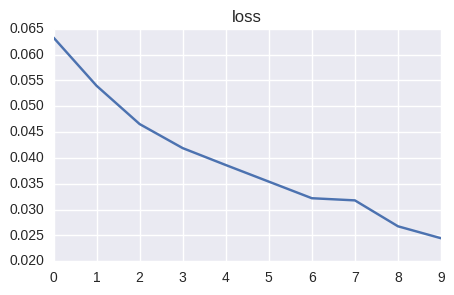

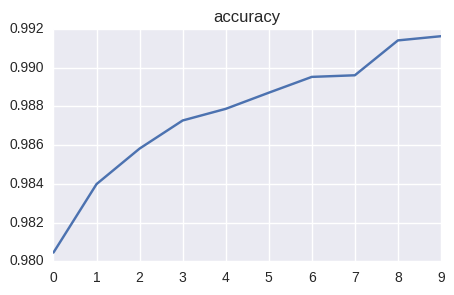

In [8]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'])
plt.title('accuracy');

### Inference

With enough training epochs, the test accuracy should exceed 99%.  

You can compare your result with the state-of-the art [here](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html).  Even more results can be found [here](http://yann.lecun.com/exdb/mnist/). 

In [9]:
%%time
scores = model.evaluate(X_test, Y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 99.17%
CPU times: user 2.37 s, sys: 247 ms, total: 2.62 s
Wall time: 2.51 s


We can again take a closer look on the results. Let's begin by defining
a helper function to show the failure cases of our classifier. 

In [10]:
def show_failures(predictions, trueclass=None, predictedclass=None, maxtoshow=10):
    rounded = np.argmax(predictions, axis=1)
    errors = rounded!=y_test
    print('Showing max', maxtoshow, 'first failures. '
          'The predicted class is shown first and the correct class in parenthesis.')
    ii = 0
    plt.figure(figsize=(maxtoshow, 1))
    for i in range(X_test.shape[0]):
        if ii>=maxtoshow:
            break
        if errors[i]:
            if trueclass is not None and y_test[i] != trueclass:
                continue
            if predictedclass is not None and predictions[i] != predictedclass:
                continue
            plt.subplot(1, maxtoshow, ii+1)
            plt.axis('off')
            if K.image_dim_ordering() == 'th':
                plt.imshow(X_test[i,0,:,:], cmap="gray")
            else:
                plt.imshow(X_test[i,:,:,0], cmap="gray")
            plt.title("%d (%d)" % (rounded[i], y_test[i]))
            ii = ii + 1

Here are the first 10 test digits the CNN classified to a wrong class:

Showing max 10 first failures. The predicted class is shown first and the correct class in parenthesis.


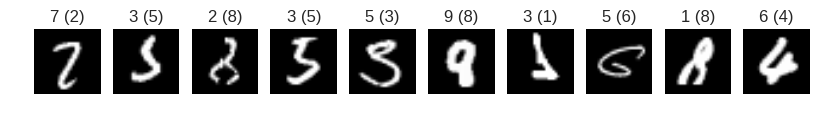

In [11]:
predictions = model.predict(X_test)

show_failures(predictions)

We can use `show_failures()` to inspect failures in more detail. For example, here are failures in which the true class was "6":

In [ ]:
show_failures(predictions, trueclass=6)

## Bonus: train the model in taito-gpu

The above model can also be run in taito-gpu in a couple of easy steps:

```sh
ssh -l USERNAME taito-gpu.csc.fi

module purge 
module load python-env/2.7.10 cuda/8.0
    
# the following two commands need to be entered only once
PYTHONUSERBASE=$USERAPPL/tensorflow.0.11.0 pip install --user /wrk/jppirhon/tensorflow.0.11.0-gcc493_pkg/tensorflow-0.11.0-py2-none-any.whl
pip install --user keras h5py Pillow
    
export PYTHONPATH=$USERAPPL/tensorflow.0.11.0/lib/python2.7/site-packages
sbatch /wrk/makoskel/run-python27-gputest.sh /wrk/makoskel/keras-mnist-cnn-taitogpu.py
```

One epoch should take about 8 seconds.  With 10 epochs, the model should have > 99% accuracy.